In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("busket_data.csv")

In [3]:
data.head()

,Distance,Shoot
0,0,1
1,0,1
2,0,1
3,0,1
4,0,0


In [4]:
logisticRegr = LogisticRegression()

In [5]:
x = data['Distance'].values.reshape(-1, 1)
y = data['Shoot']

### モデルをフィットさせる

In [6]:
logisticRegr.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

###  完成したモデルで、距離＝１のときシュートが決まるか予測する。

In [7]:
print(logisticRegr.predict([[1]]))

[1]


###  実際に確率がどう変動しているのかプロットする

In [8]:
distances = np.arange(-20, 20, 0.5)
probabilities= []
for i in distances:
    p_loss, p_win = logisticRegr.predict_proba([[i]])[0]
    probabilities.append(p_win)

Text(0,0.5,'Status (1:Won, 0:Lost)')

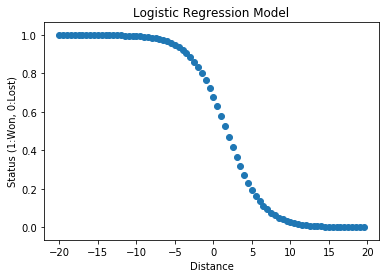

In [9]:
plt.scatter(distances,probabilities)
plt.title("Logistic Regression Model")
plt.xlabel('Distance')
plt.ylabel('Status (1:Won, 0:Lost)')

###  最後に

実際は、データをTrain用、Test用に分け、Train用のデータを用いてModel fittingを行い、Test用で答え合わせし、精度を出さなくてはいけないが、データが少ないため、このプロセスは省いた。